In [13]:
import sys; sys.path.append("../")

import os
import sys
import pickle
from model import *
from SALib.sample import sobol, saltelli
from tqdm import tqdm


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
N = 1225
mu = 10
sigma = 1
w = np.random.normal(mu, sigma, N)

In [48]:
num_comms = []
num_ccs = []
alpha_vals = np.linspace(2, 16, 32)
for alpha in tqdm(alpha_vals):
    G, cc = construct_sda_graph(w, alpha=alpha, b=1/15)
    num_ccs.append(len(cc))
    # construct communities and augmented communities
    communities = get_communities(G)
    community_membership = get_community_membership(G, communities)

    augmented_communities = {}
    for agent in community_membership:
        comms = community_membership[agent]
        for c in comms:
            if c not in augmented_communities:
                augmented_communities[c] = {agent}
            else:
                augmented_communities[c].add(agent) 
    augmented_communities = {k:np.array(list(v)) for k,v in augmented_communities.items()}
    del augmented_communities[max(augmented_communities.keys())]
    
    num_comms.append(len(augmented_communities))

100%|██████████| 32/32 [01:29<00:00,  2.79s/it]


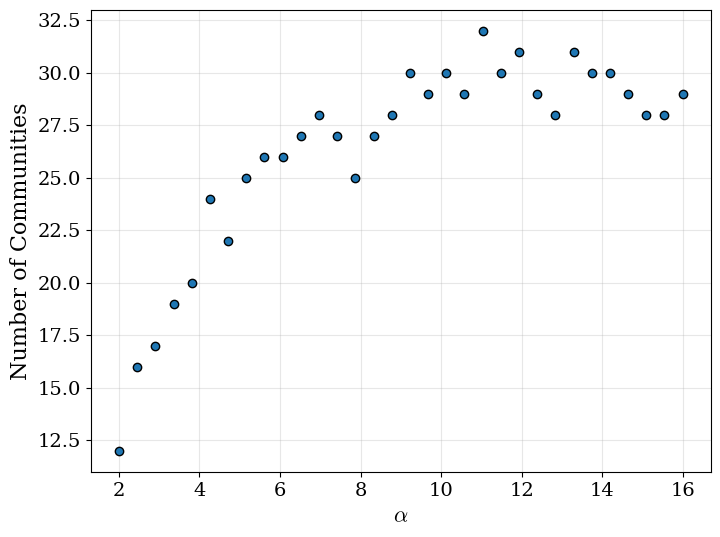

In [47]:
plt.scatter(alpha_vals, num_comms, edgecolor="k")
plt.xlabel(r"$\alpha$")
plt.ylabel("Number of Communities")
plt.show()

In [16]:
D = []
for i in range(N):
    for j in range(i+1, N):
        D.append(np.abs(w[i]-w[j]))

mean_dist = np.mean(D)
characteristic_distance = mean_dist * 1/15

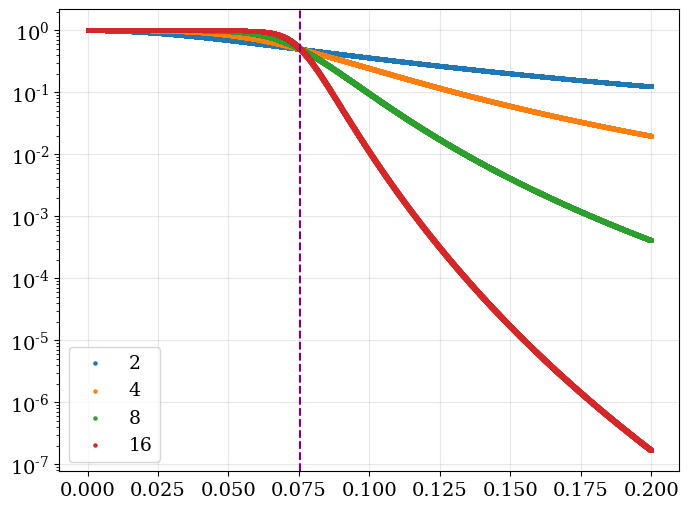

In [29]:
D = [d for d in D if d <= 0.2]

for alpha in [2, 4, 8, 16]:
    P = 1/(1+((1/characteristic_distance)*np.array(D))**alpha)
    plt.scatter(D, P, s=5, label=alpha)
    
plt.axvline(characteristic_distance, linestyle="dashed", color="purple")
plt.legend()
plt.yscale("log")
plt.show()

### Examine at gamble return distributions

1.1172690481876424 1.893694202638671 1.438117549152565
1.1269510509067269 3.072568650189164 1.8691904948351468
1.1328098889311269 4.502165025703598 2.371666241720022
1.1211245464376478 5.887815268111923 2.8643691778146154


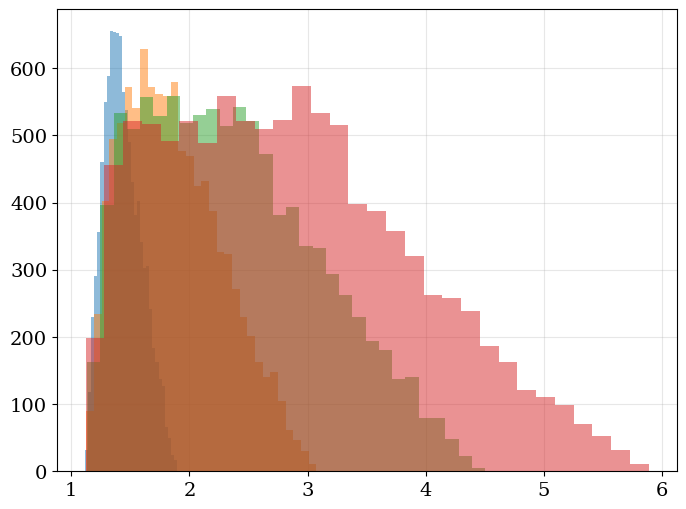

In [138]:
for r in [2.3, 4, 6, 8]:


    gambles = generate_gambles(10000, r, 0.30)

    gamble_prior_samples = np.zeros((5000, len(gambles)))
    for i,g in enumerate(gambles):
        gamble_prior_samples[:,i] = np.random.choice(g["outcomes"], 5000, p=g["probs"])
    gambles_prior_mu  = np.mean(gamble_prior_samples, axis=0)

    plt.hist(gambles_prior_mu, bins=30, alpha=0.5)
    assert min(gambles_prior_mu) >= 1.1
    print(min(gambles_prior_mu), max(gambles_prior_mu), np.mean(gambles_prior_mu))

plt.show()